In [2]:
from Ch10WorkingwithData import *

In [3]:
import random 
from Ch06Probability import inverse_normal_cdf

random.seed(0)

In [4]:
uniform = [200 * random.random() - 100 for _ in range(10_000)]
normal = [57 * inverse_normal_cdf(random.random()) for _ in range(10_000)]

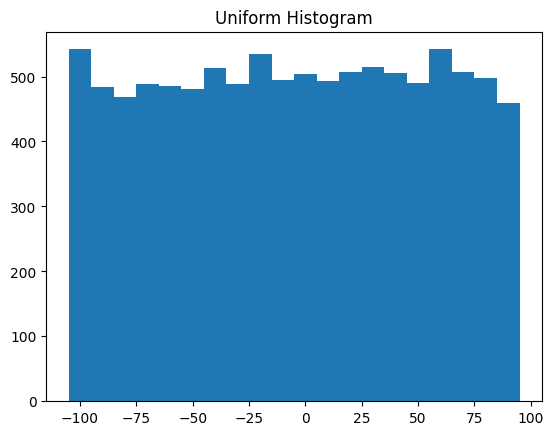

In [5]:
plot_histogram(uniform, 10, 'Uniform Histogram')

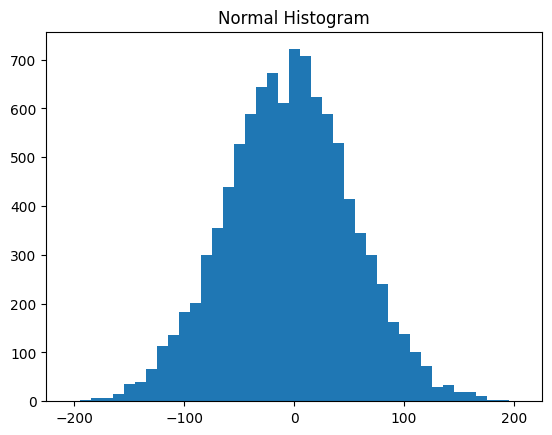

In [6]:
plot_histogram(normal, 10, 'Normal Histogram')

In this case the two distributions have a pretty different max and min, but even knowing that wouldn’t have been sufficient to understand how they differed.

### Two Dimensions

In [20]:
xs = [random_normal() for _ in range(1000)]
ys1 = [x + random_normal() / 2 for x in xs]
ys2 = [-x + random_normal() / 2 for x in xs]

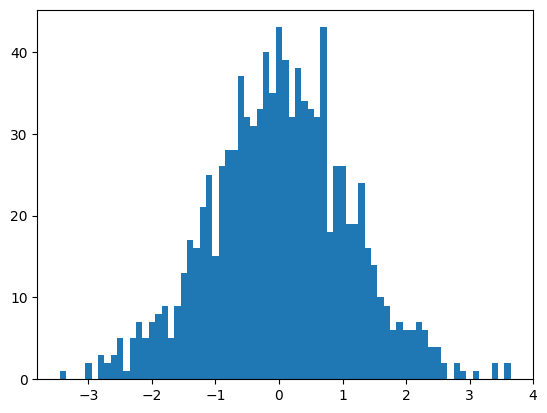

In [21]:
plot_histogram(ys1, .1)

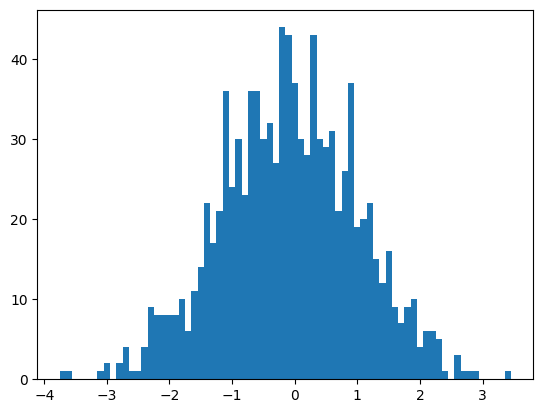

In [22]:
plot_histogram(ys2, .1)

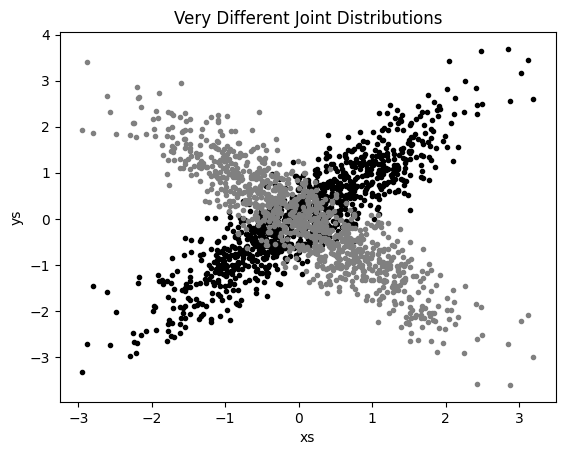

In [26]:
plt.scatter(xs, ys1, marker='.', color='black', label='ys1')
plt.scatter(xs, ys2, marker='.', color='gray', label='ys2')
plt.xlabel('xs')
plt.ylabel('ys')
plt.title('Very Different Joint Distributions')
plt.show()

In [29]:
from Ch05Statistics import correlation

In [30]:
correlation(xs, ys1)

0.8934905261350109

In [31]:
correlation(xs, ys2)

-0.8890960007239185

### Many Dimensions

In [50]:
from Ch04LinearAlgebra import *

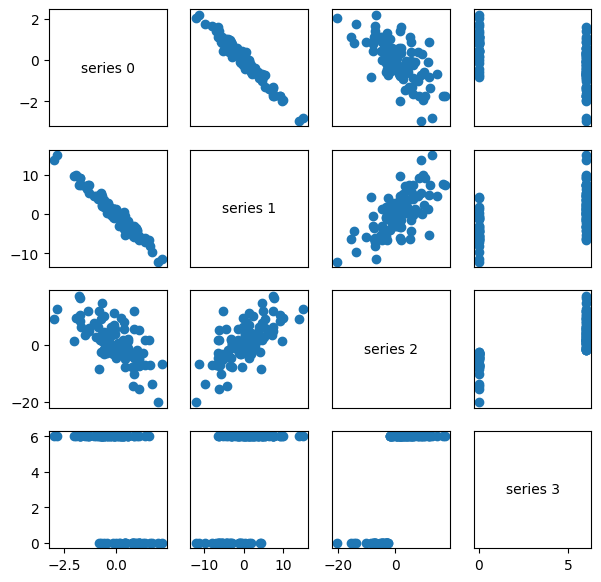

In [70]:
num_points = 100

def random_row():
    row = [None, None, None, None]
    row[0] = random_normal()
    row[1] = -5 * row[0] + random_normal()
    row[2] = row[0] + row[1] + 5 * random_normal()
    row[3] = 6 if row[2] > -2 else 0
    return row

random.seed(0)
corr_data = [random_row() for _ in range(num_points)]

num_vectors = len(corr_data)
_, num_columns = shape(corr_data)

fig, ax = plt.subplots(num_columns, num_columns, figsize=(7, 7))

for i in range(num_columns):
    for j in range(num_columns):
        if i != j:
            ax[i][j].scatter(get_column(data, j), get_column(corr_data, i))
        else:
            ax[i][j].annotate('series ' + str(i), (.5, .5),
                              xycoords='axes fraction',
                              ha='center', va='center')
        if i < num_columns - 1:
            ax[i][j].xaxis.set_visible(False)
        if j > 0:
            ax[i][j].yaxis.set_visible(False)
ax[-1][-1].set_xlim(ax[0][-1].get_xlim())
ax[0][0].set_ylim(ax[0][1].get_ylim())
plt.show()